### Plotting alignment data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import json
import csv
import pandas as pd
import utils.db_utils as db
import utils.plot_utils as plot
import utils.file_utils as file

targetLang = 'en'
bibleType = 'en_ult'
dbPath = f'./data/{bibleType}_alignments.sqlite'

connection = db.initAlignmentDB(dbPath)

Connection to SQLite DB successful


In [2]:
def getFrequenciesOfFieldInAlignments(alignmentsForWord, field, sortIndex = False):
    frequenciesOfAlignments = {}
    # for each word add line to plot
    for origWord in alignmentsForWord.keys():
        wordAlignments_ = pd.DataFrame(alignmentsForWord[origWord])
        frequency_ = wordAlignments_[field].value_counts()
        if sortIndex:
            frequency_ = frequency_.sort_index()
        frequenciesOfAlignments[origWord] = frequency_

    return frequenciesOfAlignments

def getDataFrameForOriginalWords(connection, words, searchLemma = True, minAlignments = 100):
    alignments_ = db.getAlignmentsForOriginalWords(connection, words, searchLemma)
    alignmentsList, rejectedAlignmentsList = db.filterAlignments(alignments_, minAlignments)
    alignments = pd.DataFrame(alignmentsList)
    return alignments

def getFilteredAlignmentsForWord(alignmentsForWord, remove = []):
    filteredAlignmentsForWord = {}
    for origWord in alignmentsForWord.keys():
        print(f"{origWord}")
        if not origWord in remove:
            alignments = alignmentsForWord[origWord]
            alignmentsCount = len(alignments)
            if alignmentsCount >= minAlignments:
                filteredAlignmentsForWord[origWord] = alignments

    return filteredAlignmentsForWord

def getFilteredLemmas(termsPath, minAlignments, remove = []):
    data = file.initJsonFile(termsPath)
    lemmasList = list(data.keys())
    print (f"'{termsPath}' has count: {len(lemmasList)}")
    filteredLemmas = {}
    for lemma in lemmasList:
        item = data[lemma]
        if item['count'] >= minAlignments:
            filteredLemmas[lemma] = item

    for item in remove:
        if item in filteredLemmas:
            del filteredLemmas[item]
    print (f"filtered count: {len(filteredLemmas)}")

    return lemmasList

def zeroFillFrequencies(field_frequencies):
    filledFrequencies = {}
    for originalWord in field_frequencies.keys():
        field_frequency = field_frequencies[originalWord]
        X = []
        Y = []

        def appendXY(x,y):
            X.append(x)
            Y.append(y)

        lastX = 0
        for key in field_frequency.keys():
            x = key
            y = field_frequency[key]
            while x > lastX: # do zero fill
                appendXY(lastX, 0)
                lastX += 1
            appendXY(x, y)
            lastX += 1
        appendXY(lastX, 0)
        filledFrequencies[originalWord] = {
            'X': X,
            'Y': Y
        }
    return filledFrequencies

In [3]:
minAlignments = 100
termsPath = './data/kt_en_NT_lemmas.json'
remove = ['ὁ']
lemmasList = getFilteredLemmas(termsPath, minAlignments, remove)

'./data/kt_en_NT_lemmas.json' has count: 701
filtered count: 49


In [4]:
# find all alignments for this lemma

alignmentsForWord = db.getAlignmentsForOriginalWords(connection, lemmasList, searchLemma = True)

updating 'βδέλυγμα'
updating 'βδελύσσομαι'
updating 'μοιχεύω'
updating 'μοιχάω'
updating 'μοιχαλίς'
updating 'μοιχεία'
updating 'μοιχός'
updating 'θυσιαστήριον'
updating 'βωμός'
updating 'ἀμήν'
updating 'ἄγγελος'
Replacing "angel s" with "angel's"
Replacing "the angel s measure" with "the angel's measure"
updating 'ἰσάγγελος'
updating 'ἀρχάγγελος'
updating 'ἀλείφω'
updating 'μυρίζω'
updating 'χρίω'
updating 'ἐπιχρίω'
updating 'χρῖσμα'
updating 'ἐγχρίω'
updating 'ἀπόστολος'
updating 'ἀποστολή'
updating 'τάσσω'
updating 'καθίστημι'
updating 'τίθημι'
updating 'ποιέω'
updating 'κεῖμαι'
updating 'ἀναδείκνυμι'
updating 'διατίθημι'
updating 'προχειρίζω'
updating 'προστάσσω'
updating 'ὁρίζω'
updating 'προθεσμία'
updating 'κιβωτός'
updating 'ἐξουσία'
updating 'κατεξουσιάζω'
updating 'ἐξουσιάζω'
updating 'δυνάστης'
updating 'ὑπεροχή'
updating 'αὐθεντέω'
updating 'ἐπιταγή'
updating 'κυριότης'
updating 'βαπτίζω'
updating 'βάπτισμα'
updating 'βαπτιστής'
updating 'βαπτισμός'
updating 'πιστεύω'
updat

In [5]:
remove = ['ὁ']
filteredAlignmentsForWord = getFilteredAlignmentsForWord(alignmentsForWord, remove)

βδέλυγμα
βδελύσσομαι
μοιχεύω
μοιχάω
μοιχαλίς
μοιχεία
μοιχός
θυσιαστήριον
βωμός
ἀμήν
ἄγγελος
ἰσάγγελος
ἀρχάγγελος
ἀλείφω
μυρίζω
χρίω
ἐπιχρίω
χρῖσμα
ἐγχρίω
ἀπόστολος
ἀποστολή
τάσσω
καθίστημι
τίθημι
ποιέω
κεῖμαι
ἀναδείκνυμι
διατίθημι
προχειρίζω
προστάσσω
ὁρίζω
προθεσμία
κιβωτός
ἐξουσία
κατεξουσιάζω
ἐξουσιάζω
δυνάστης
ὑπεροχή
αὐθεντέω
ἐπιταγή
κυριότης
βαπτίζω
βάπτισμα
βαπτιστής
βαπτισμός
πιστεύω
ἀπιστία
ἄπιστος
πιστός
πίστις
ἀγαπητός
ἀγαπάω
βλασφημέω
βλασφημία
βλάσφημος
μακάριος
εὐλογέω
κατευλογέω
εὐλογητός
μακαρίζω
ἐνευλογέω
μακαρισμός
εὐλογία
μακαριώτερος
αἷμα
σῶμα
πτῶμα
σωματικός
πειθαρχέω
κατέχω
σύνσωμος
κῶλον
παραδίδωμι
δέω
δεσμεύω
ὀφείλω
δεσμός
καταδέω
περιδέω
σύνδεσμος
ἀναθεματίζω
περίκειμαι
δουλεία
συνκλείω
δουλόω
δέσμιος
συνδέω
φείδομαι
παλιγγενεσία
γεννάω
παλινγενεσία
ἀναγεννάω
ἀδελφός
ἀδελφότης
λέγω
καλέω
προσκαλέω
ἐπικαλέω
προσφωνέω
φωνέω
κλητός
συνκαλέω
ἐπιλέγω
μεταπέμπω
μετακαλέω
χρηματίζω
ὀνομάζω
παρακαλέω
κλῆσις
ψευδώνυμος
ἑκατόνταρχος
ἑκατοντάρχης
κεντυρίων
παιδίον
παῖς
τέ

In [6]:
# find all alignments for this original word

# word = 'Θεός' # found 69
# word = 'Θεὸς' # found 239
# word = 'Θεοῦ'  # found 712
# origAlignments = getDataFrameForOriginalWords(connection, word, searchLemma = False)
# origAlignments

In [7]:
# db.describeAlignments(origAlignments)

### Analysis of alignments for keyterms in the en_ult:

#### Frequency of alignments:

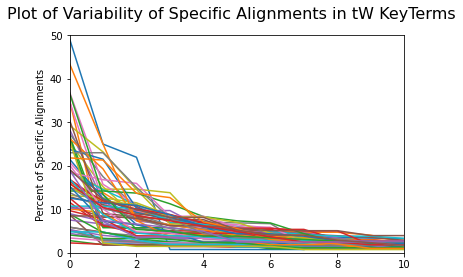

In [8]:
frequenciesOfAlignments = getFrequenciesOfFieldInAlignments(filteredAlignmentsForWord, 'alignmentTxt')

title = f"Plot of Variability of Specific Alignments in tW KeyTerms"
ylabel = "Percent of Specific Alignments"
xlimit = [0, 10]
plot.plotFrequencies(frequenciesOfAlignments, title, ylabel, showXValues=False, xlimit=xlimit)

### Analysis:

#### Analysis of numerical metrics:

#### Analysis of original language word count:

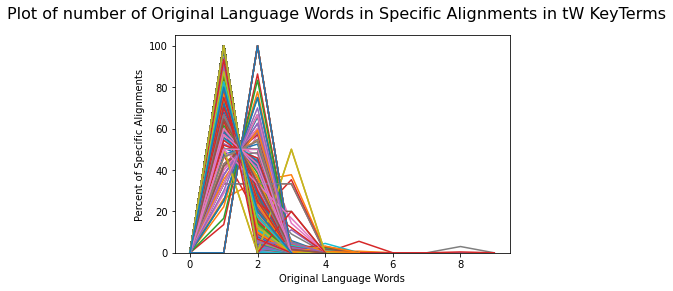

In [9]:
field = 'alignmentOrigWords'
field_frequencies = getFrequenciesOfFieldInAlignments(alignmentsForWord, field, sortIndex = True)
filledFrequencies = zeroFillFrequencies(field_frequencies)

title = f"Plot of number of Original Language Words in Specific Alignments in tW KeyTerms"
ylabel = "Percent of Specific Alignments"
xlabel = "Original Language Words"
plot.plotXYdataDict(filledFrequencies, title, ylabel, xlabel, showXValues=True)

##### Notes:
- this field analysis suggests that original word counts are tight - a threshold word count of 3 probably good for English to flag for review.
<p></p>

#### Analysis of target language word count:

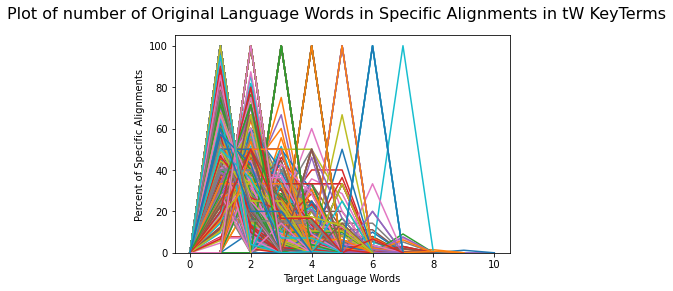

In [10]:
field = 'alignmentTargetWords'
field_frequencies = getFrequenciesOfFieldInAlignments(alignmentsForWord, field, sortIndex = True)
filledFrequencies = zeroFillFrequencies(field_frequencies)

title = f"Plot of number of Original Language Words in Specific Alignments in tW KeyTerms"
ylabel = "Percent of Specific Alignments"
xlabel = "Target Language Words"
plot.plotXYdataDict(filledFrequencies, title, ylabel, xlabel, showXValues=True)

##### Notes:
- this field analysis suggests that a threshold word count of 3 probably good for English to flag for review.
<p></p>

#### Analysis of count of extra unaligned words between aligned original language words:

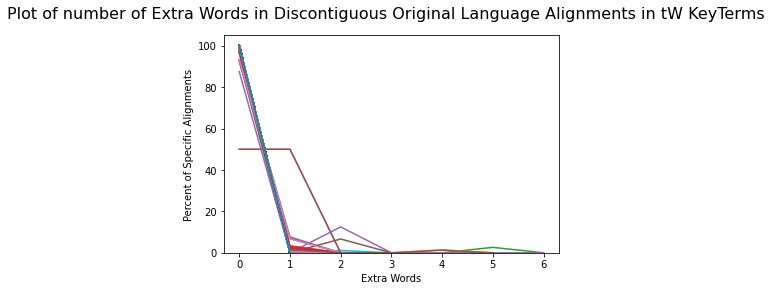

In [11]:
field = 'origWordsBetween'
field_frequencies = getFrequenciesOfFieldInAlignments(alignmentsForWord, field, sortIndex = True)
filledFrequencies = zeroFillFrequencies(field_frequencies)

title = f"Plot of number of Extra Words in Discontiguous Original Language Alignments in tW KeyTerms"
ylabel = "Percent of Specific Alignments"
xlabel = "Extra Words"
plot.plotXYdataDict(filledFrequencies, title, ylabel, xlabel, showXValues=True)

##### Notes:
- this field analysis suggests that most original language alignments probably good. Probably the cases of a word between aligned words should be reviewed.
<p></p>

#### Analysis of count of extra unaligned words between aligned target language words:

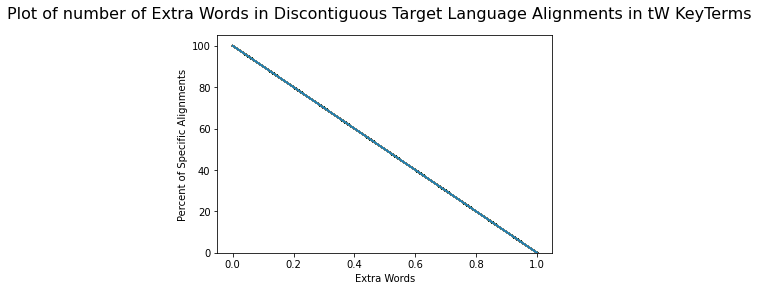

In [12]:
field = 'targetWordsBetween'
field_frequencies = getFrequenciesOfFieldInAlignments(alignmentsForWord, field, sortIndex = True)
filledFrequencies = zeroFillFrequencies(field_frequencies)

title = f"Plot of number of Extra Words in Discontiguous Target Language Alignments in tW KeyTerms"
ylabel = "Percent of Specific Alignments"
xlabel = "Extra Words"
plot.plotXYdataDict(filledFrequencies, title, ylabel, xlabel, showXValues=True)

##### Notes:
- this field analysis suggests that most target language alignments are very tight.

#### Generate CSV of questionable alignments:

In [36]:
alignmentOrigWordsThreshold = 3
alignmentTargetWordsThreshold = 5
origWordsBetweenThreshold = 1
targetWordsBetweenThreshold = 1
alignmentsToCheck = []

for origWord in alignmentsForWord.keys():
    alignments = alignmentsForWord[origWord]
    for alignment in alignments:
        warnings = []

        alignmentOrigWords = alignment['alignmentOrigWords']
        if alignmentOrigWords >= alignmentOrigWordsThreshold:
            warnings.append(f"Too many original language words in alignment: {alignmentOrigWords}, threshold {alignmentOrigWordsThreshold}")

        alignmentTargetWords = alignment['alignmentTargetWords']
        if alignmentTargetWords >= alignmentTargetWordsThreshold:
            warnings.append(f"Too many target language words in alignment: {alignmentTargetWords}, threshold {alignmentTargetWordsThreshold}")

        origWordsBetween = alignment['origWordsBetween']
        if origWordsBetween >= origWordsBetweenThreshold:
            warnings.append(f"Discontiguous original language alignment, extra words: {origWordsBetween}, threshold {origWordsBetweenThreshold}")

        targetWordsBetween = alignment['targetWordsBetween']
        if targetWordsBetween >= targetWordsBetweenThreshold:
            warnings.append(f"Discontiguous target language alignment, extra words: {targetWordsBetween}, threshold {targetWordsBetweenThreshold}")

        if len(warnings):
            alignment['warnings'] = json.dumps(warnings, ensure_ascii = False)
            alignmentsToCheck.append(alignment)

basePath = './data/kt_en_NT_warnings'
jsonPath = basePath + '.json'
file.writeJsonFile(jsonPath, alignmentsToCheck)

df = pd.DataFrame(alignmentsToCheck)
csvPath = basePath + '.csv'
warningData = df.drop(columns=["id", "origSpan", "targetSpan"]).sort_values(by=["book_id", "chapter", "verse", "alignment_num"])
warningData.to_csv(path_or_buf=csvPath, index=False, header=True, quoting=csv.QUOTE_NONNUMERIC)